In [ ]:
!pip install opencv-contrib-python



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_data = []
labels = []
root_dir="/content/drive/MyDrive/Revan_2023/Dataset"
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        label = folder_name  # You can assign a label based on the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the extensions as needed
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)  # Read the image using OpenCV
                # resizing

                image = cv2.resize(image,(200,200))
                # Normalization
                image = image / 255

                image_data.append(image)
                labels.append(label)


In [ ]:
print(image_data)
print(labels)

[array([[[0.20784314, 0.44705882, 0.4745098 ],
        [0.30588235, 0.58039216, 0.57647059],
        [0.27058824, 0.57254902, 0.60392157],
        ...,
        [0.16078431, 0.27843137, 0.37647059],
        [0.17254902, 0.3254902 , 0.38039216],
        [0.17647059, 0.36862745, 0.43921569]],

       [[0.21176471, 0.44705882, 0.55294118],
        [0.12156863, 0.36078431, 0.41960784],
        [0.11372549, 0.32941176, 0.41568627],
        ...,
        [0.17254902, 0.33333333, 0.4       ],
        [0.10980392, 0.27843137, 0.28235294],
        [0.26666667, 0.45098039, 0.5254902 ]],

       [[0.34509804, 0.61176471, 0.71764706],
        [0.06666667, 0.29411765, 0.38039216],
        [0.25098039, 0.52156863, 0.63529412],
        ...,
        [0.1254902 , 0.34901961, 0.36862745],
        [0.12941176, 0.2627451 , 0.39607843],
        [0.16470588, 0.36862745, 0.4       ]],

       ...,

       [[0.27058824, 0.54117647, 0.63529412],
        [0.10588235, 0.37254902, 0.49411765],
        [0.30196078, 

In [ ]:
print(len(labels))
print(len(image_data))

255
255



 Merged Dataset of Images From various Speices



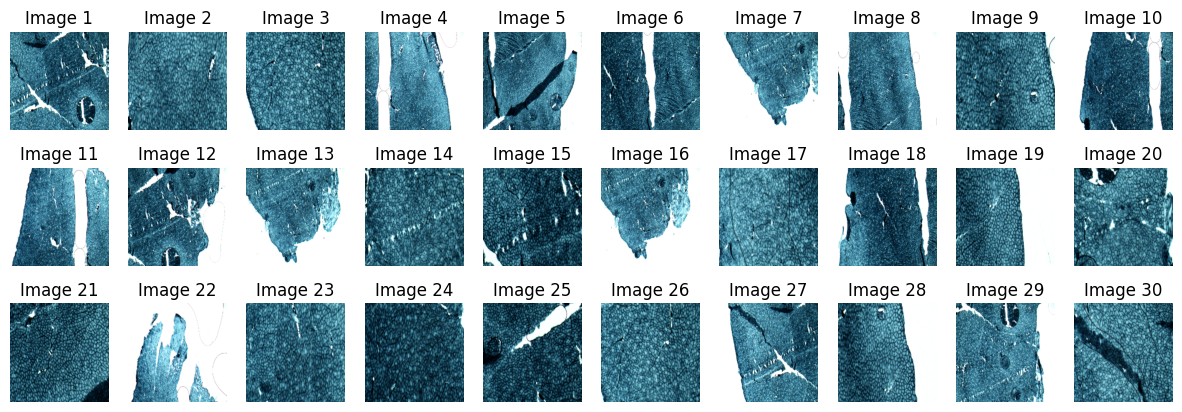

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 30
print ("\n Merged Dataset of Images From various Speices\n")
# Create a figure with subplots
fig, axs = plt.subplots(3, 10, figsize=(15, 5))

# Flatten the axs array for easier indexing
axs = axs.ravel()

# Loop through and display the images
for i in range(num_images):
    image = image_data[i]  # Replace "dataset" with your dataset variable
    axs[i].imshow(image)
    axs[i].set_title(f"Image {i + 1}")
    axs[i].axis('off')  # Turn off axis labels

plt.show()


In [ ]:

from collections import Counter
distinct_count_dict = {}
for item in labels:
    if item in distinct_count_dict:
        distinct_count_dict[item] += 1
    else:
        distinct_count_dict[item] = 1

print("Distinct Category Data with Counts :")
for item, count in distinct_count_dict.items():
    print(f"{item}: {count}")
distinct_count = len(set(labels))
print("Distinct Count:", distinct_count)

Distinct Category Data with Counts :
TR10: 36
TR39: 39
TR44: 27
TR21: 36
TR03: 35
TR36: 44
TR02: 38
Distinct Count: 7


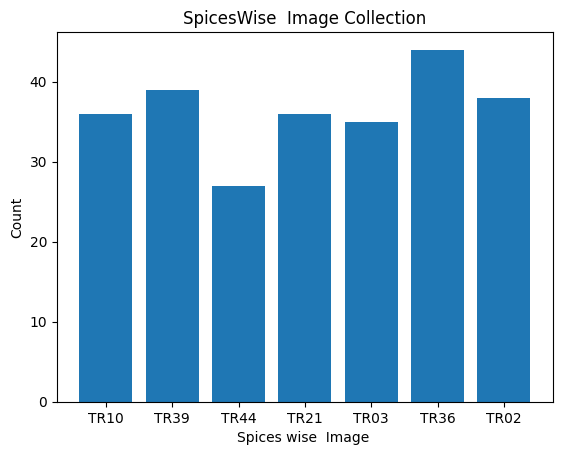

In [ ]:
distinct_data = list(distinct_count_dict.keys())
counts = list(distinct_count_dict.values())

# Create a bar chart
plt.bar(distinct_data, counts)

plt.xlabel('Spices wise  Image ')
plt.ylabel('Count')
plt.title('SpicesWise  Image Collection')


plt.show()








 Images from Spieces of Each Category
 


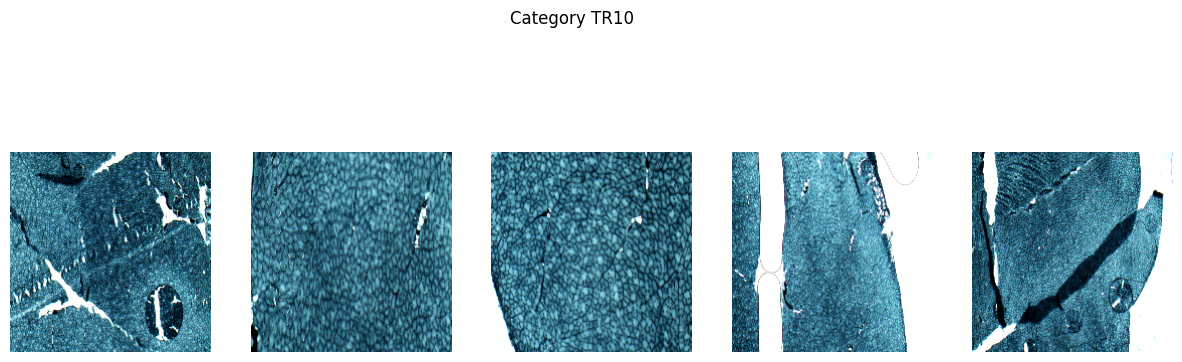

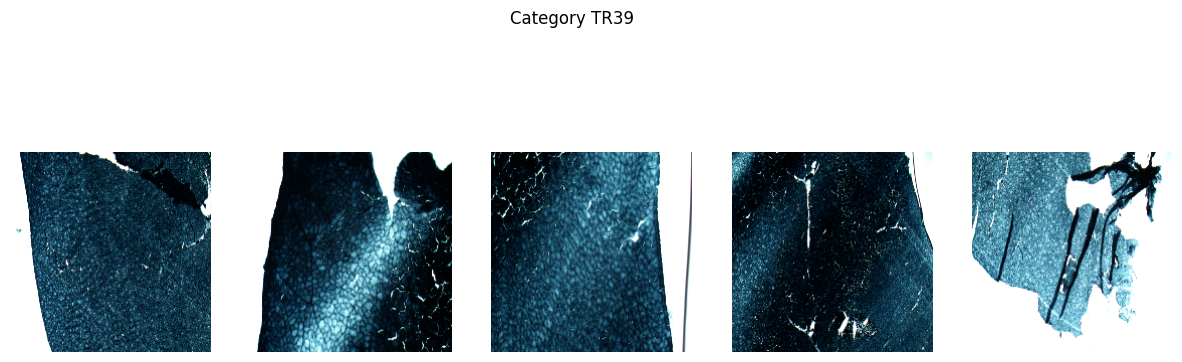

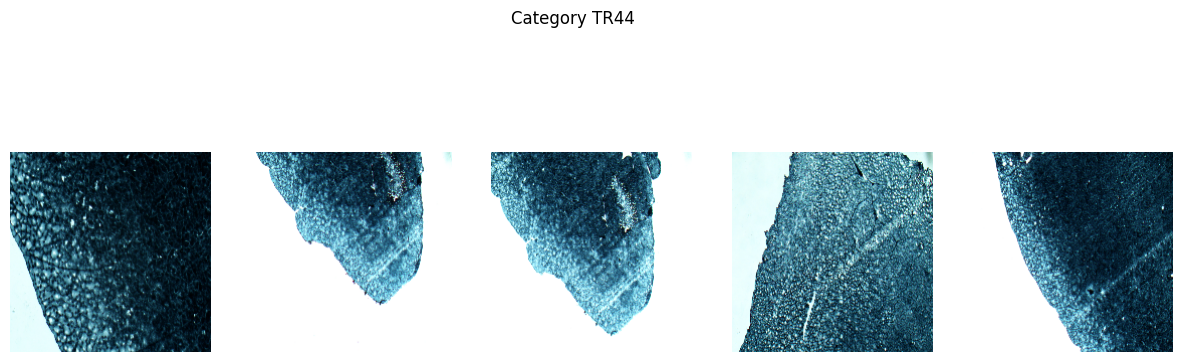

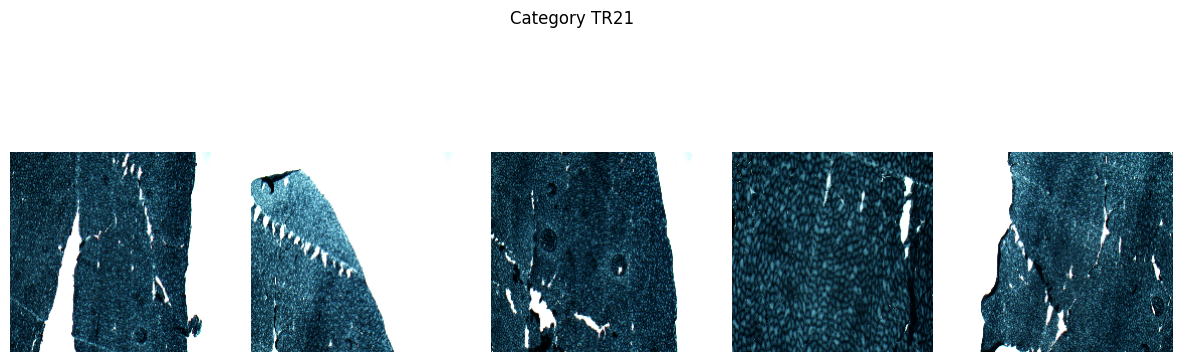

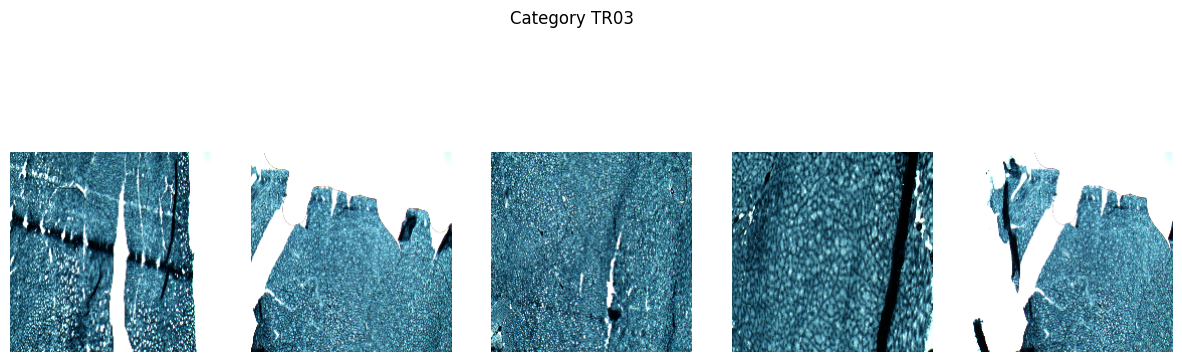

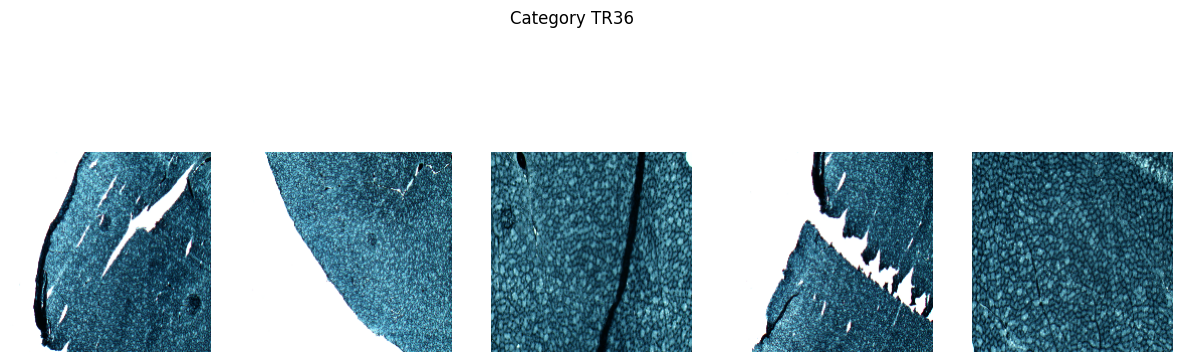

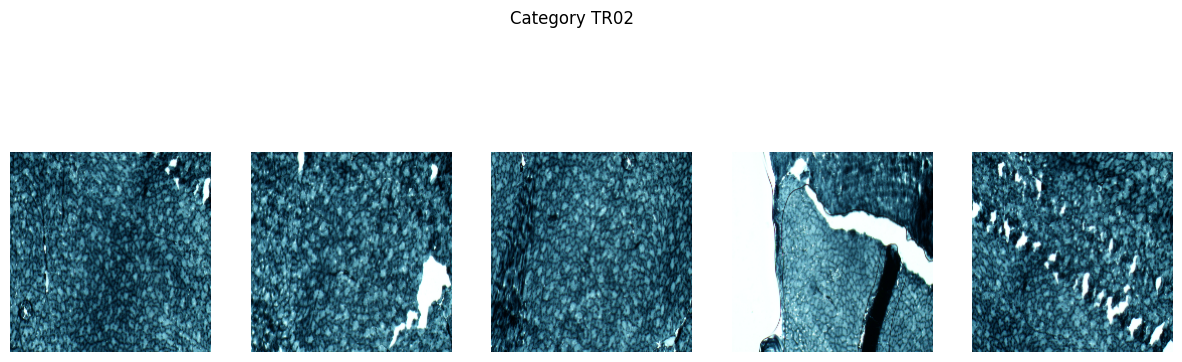

In [ ]:
import matplotlib.pyplot as plt

print ("\n Images from Spieces of Each Category\n ")
# Create a dictionary to group images by category
category_images = {}
for label, image in zip(labels, image_data):
    if label in category_images:
        category_images[label].append(image)
    else:
        category_images[label] = [image]

# Prepare to display 5 images from each category
categories_to_display = 5

# Create subplots for each category and display 5 images
for category, images in category_images.items():
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Category {category}')

    for i in range(min(categories_to_display, len(images))):
        plt.subplot(1, categories_to_display, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:


label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(X_train[:1])

[array([[[0.00784314, 0.0745098 , 0.12156863],
        [0.        , 0.03921569, 0.09411765],
        [0.        , 0.01176471, 0.04313725],
        ...,
        [1.        , 1.        , 1.        ],
        [0.96470588, 0.99607843, 0.99215686],
        [0.51764706, 0.40392157, 0.51372549]],

       [[0.        , 0.03137255, 0.05882353],
        [0.        , 0.04313725, 0.0745098 ],
        [0.00392157, 0.03137255, 0.0627451 ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.97254902, 0.99607843, 0.99215686],
        [0.51764706, 0.39607843, 0.50980392]],

       [[0.00392157, 0.06666667, 0.11372549],
        [0.        , 0.03137255, 0.0627451 ],
        [0.        , 0.04705882, 0.0627451 ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.96470588, 0.99607843, 0.99215686],
        [0.51764706, 0.39215686, 0.50980392]],

       ...,

       [[0.05490196, 0.21960784, 0.30588235],
        [0.02745098, 0.16470588, 0.22745098],
        [0.16078431, 

In [ ]:
print(y_train[:1])

[5]


In [ ]:
print(X_test[:1])

[array([[[0.89019608, 1.        , 1.        ],
        [0.91372549, 0.99607843, 1.        ],
        [0.9372549 , 1.        , 0.99607843],
        ...,
        [0.63921569, 0.83529412, 0.79215686],
        [0.75686275, 0.90980392, 0.87843137],
        [0.82352941, 0.95294118, 0.95294118]],

       [[0.90588235, 1.        , 1.        ],
        [0.92156863, 1.        , 1.        ],
        [0.93333333, 1.        , 0.99607843],
        ...,
        [0.65882353, 0.85098039, 0.81176471],
        [0.74509804, 0.91764706, 0.89019608],
        [0.84705882, 0.97647059, 0.95294118]],

       [[0.91372549, 0.99607843, 1.        ],
        [0.92941176, 1.        , 0.99607843],
        [0.94117647, 0.99607843, 0.99215686],
        ...,
        [0.67843137, 0.87058824, 0.83137255],
        [0.77254902, 0.92156863, 0.89803922],
        [0.84705882, 0.97647059, 0.94901961]],

       ...,

       [[0.25098039, 0.5254902 , 0.58039216],
        [0.20392157, 0.30196078, 0.32941176],
        [0.3372549 , 

In [ ]:
print(y_test[:1])

[4]


In [ ]:
dataset_path = root_dir
image_size = (200, 200)
batch_size = 4


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Augmentation PreProcess
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 205 images belonging to 7 classes.
Found 47 images belonging to 7 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_generator, epochs=80, validation_data=validation_generator)


Epoch 1/80
52/52 [==============================] - 43s 787ms/step - loss: 3.0500 - accuracy: 0.1268 - val_loss: 1.9341 - val_accuracy: 0.1489
Epoch 2/80
52/52 [==============================] - 40s 768ms/step - loss: 1.8288 - accuracy: 0.1902 - val_loss: 1.9228 - val_accuracy: 0.1277
Epoch 3/80
52/52 [==============================] - 39s 752ms/step - loss: 1.7526 - accuracy: 0.2585 - val_loss: 1.9749 - val_accuracy: 0.1489
Epoch 4/80
52/52 [==============================] - 39s 747ms/step - loss: 1.8101 - accuracy: 0.3220 - val_loss: 1.8792 - val_accuracy: 0.2553
Epoch 5/80
52/52 [==============================] - 40s 756ms/step - loss: 1.7743 - accuracy: 0.3610 - val_loss: 1.9616 - val_accuracy: 0.2128
Epoch 6/80
52/52 [==============================] - 39s 752ms/step - loss: 1.5793 - accuracy: 0.3951 - val_loss: 2.1144 - val_accuracy: 0.1489
Epoch 7/80
52/52 [==============================] - 39s 743ms/step - loss: 1.4916 - accuracy: 0.4780 - val_loss: 2.1926 - val_accuracy: 0.1277

In [ ]:
# Assuming you've trained the model using the steps in the previous response

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


12/12 [==============================] - 4s 291ms/step - loss: 1.9415 - accuracy: 0.1702
Test Loss: 1.9415184259414673
Test Accuracy: 0.1702127605676651


In [ ]:
# # Assuming you have a new image
# new_image = ...  # Load or preprocess your new image

# # Reshape the image to match the expected input shape
# new_image = np.expand_dims(new_image, axis=0)

# # Perform prediction
# predictions = model.predict(new_image)

# # Decode the predictions to obtain class labels
# predicted_class = np.argmax(predictions, axis=1)
# print(f'Predicted Class: {predicted_class}')


12/12 [==============================] - 4s 323ms/step


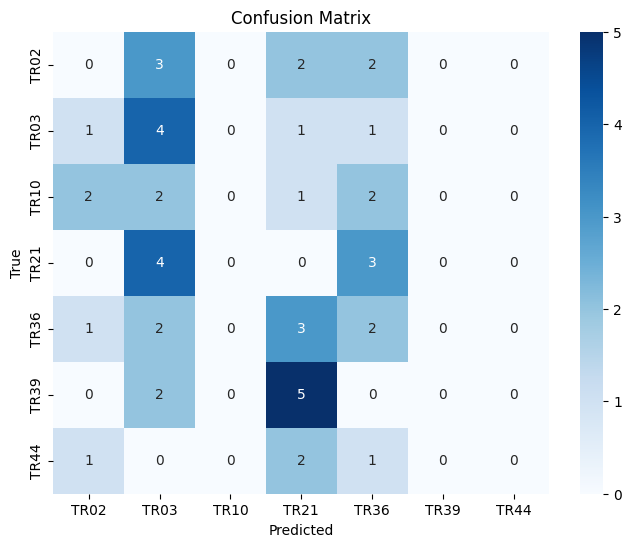

              precision    recall  f1-score   support

        TR02       0.00      0.00      0.00         7
        TR03       0.24      0.57      0.33         7
        TR10       0.00      0.00      0.00         7
        TR21       0.00      0.00      0.00         7
        TR36       0.18      0.25      0.21         8
        TR39       0.00      0.00      0.00         7
        TR44       0.00      0.00      0.00         4

    accuracy                           0.13        47
   macro avg       0.06      0.12      0.08        47
weighted avg       0.07      0.13      0.09        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained the model and have a test generator
predictions = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(y_true, y_pred, target_names=train_generator.class_indices)
print(class_report)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50

# # Load ResNet50 model without top (include_top=False)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Customize the top layers for your task
# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# # Create a new model
# epochs=5
# model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, epochs=epochs, validation_data=validation_generator)




In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
 epochs=10
 model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/10
52/52 [==============================] - 69s 1s/step - loss: 6.8918 - accuracy: 0.0976 - val_loss: 2.2865 - val_accuracy: 0.1489
Epoch 2/10
52/52 [==============================] - 57s 1s/step - loss: 2.1063 - accuracy: 0.1268 - val_loss: 1.9452 - val_accuracy: 0.1489
Epoch 3/10
52/52 [==============================] - 57s 1s/step - loss: 1.9946 - accuracy: 0.1659 - val_loss: 1.9443 - val_accuracy: 0.1702
Epoch 4/10
52/52 [==============================] - 62s 1s/step - loss: 1.9442 - accuracy: 0.1756 - val_loss: 1.9434 - val_accuracy: 0.1702
Epoch 5/10
52/52 [==============================] - 54s 1s/step - loss: 1.9435 - accuracy: 0.1756 - val_loss: 1.9427 - val_accuracy: 0.1702
Epoch 6/10
52/52 [==============================] - 55s 1s/step - loss: 1.9428 - accuracy: 0.1756 - val_loss: 1.9417 - val_accuracy: 0.1702
Epoch 7/10
52/52 [==============================] - 53s 1s/step - loss: 1.9421 - accuracy: 0.1756 - val_loss: 1.9412 - val_accuracy: 0.1702
Epoch 8/10
52/52 [==

In [ ]:
# Assuming you've trained the model using the steps in the previous response

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


12/12 [==============================] - 7s 556ms/step - loss: 1.9393 - accuracy: 0.1702
Test Loss: 1.9392905235290527
Test Accuracy: 0.1702127605676651


12/12 [==============================] - 8s 549ms/step


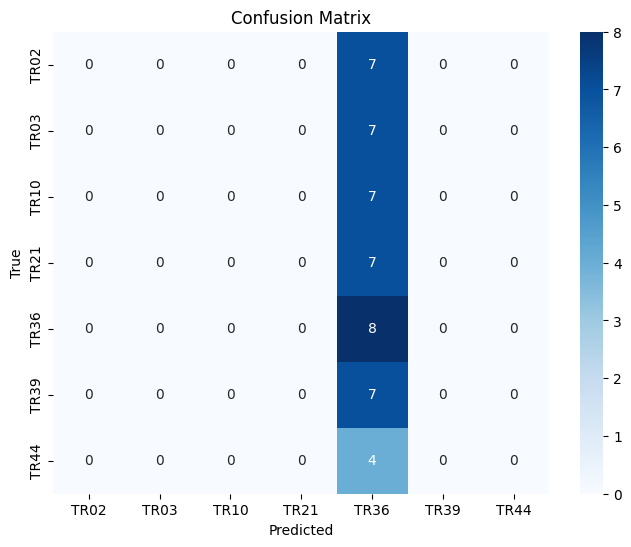

              precision    recall  f1-score   support

        TR02       0.00      0.00      0.00         7
        TR03       0.00      0.00      0.00         7
        TR10       0.00      0.00      0.00         7
        TR21       0.00      0.00      0.00         7
        TR36       0.17      1.00      0.29         8
        TR39       0.00      0.00      0.00         7
        TR44       0.00      0.00      0.00         4

    accuracy                           0.17        47
   macro avg       0.02      0.14      0.04        47
weighted avg       0.03      0.17      0.05        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained the model and have a test generator
predictions = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(y_true, y_pred, target_names=train_generator.class_indices)
print(class_report)